In [12]:
# Import libraries
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

training_data = [
    np.array([0,0,1]),
    np.array([0,1,1]),
    np.array([1,0,1]),
    np.array([1,1,1]),
]

target = [0,1,1,0]

w = np.random.rand(3) # Initializing weights randomly.
errors = []
eta = 0.2 # Learning rate
n = 100 # Number of iterations

In [371]:
class ANN:
    ''' This is an artificial neural network'''
    def __init__(self, numLayers, Input, hiddenNeuronList=[]):
        self.numLayers = numLayers
        self.numHiddenLayers = numLayers - 2
        
        if not len(hiddenNeuronList):
            self.hiddenNeuronList = [len(Input)]*self.numHiddenLayers ## Should be changed later to something more general
        else:
            self.hiddenNeuronList = hiddenNeuronList
            
        self.construct_network(Input)
        self.connect_layers()
            
    def construct_network(self,Input):
        # Input layer Stuff
        self.input_layer = input_layer(Input)
        
        # Create Hidden Layers
        self.hidden_layers = [hidden_layer(self.hiddenNeuronList[i]) for i in range(self.numHiddenLayers)]
        
        # Create output layer
        self.output_layer = output_layer(1)
        
        self.layers = [self.input_layer] + self.hidden_layers + [self.output_layer]

    def connect_layers(self):
        '''Connect layers'''
        # Input layer
        self.hidden_layers[0].connect_layer(self.input_layer)
        # Hidden layers
        for n in range(self.numHiddenLayers-1):
            self.hidden_layers[n+1].connect_layer(self.hidden_layers[n])
        # Output layer
        self.output_layer.connect_layer(self.hidden_layers[-1])
    
    def error_function(t,o):
        '''This is the error function'''
        return 1/2*((t-o)**2)

    def update_weights(self, target):
        self.output_layer.backpropagate(target)
        for layer in self.hidden_layers[::-1]:
            layer.backpropagate()
            
        for layer in self.layers[::-2]:
            layer.update()

            
class neuron_layer:
    ''' This is a neural network layer'''

    def __init__(self, N):
        self.N = N
        self.neurons = [neuron(self) for i in range(N)]

    def connect_layer(self, prev_layer):
        self.prev_layer = prev_layer
        prev_layer.set_next_layer(self)
        numEdges = prev_layer.N * self.N
        for n in self.neurons:
            n.initialize_weights(prev_layer.N)
        
    def compute_layer(self):
        y = []
        for n in self.neurons:
            y.append(n.compute(self.prev_layer.output))
        self.output = y
        return self.output
    

class input_layer(neuron_layer):
    ''' This is the input layer'''

    def __init__(self, Input):
        self.N = len(Input)
        self.output = self.compute_layer(Input)
    
    def compute_layer(self,x):
        return np.array(x)
    
    def set_next_layer(self, next_layer):
        self.next_layer = next_layer

class hidden_layer(neuron_layer):
    def set_next_layer(self, next_layer):
        self.next_layer = next_layer
        
    def backpropagate(self):
        self.delta = []
        next_delta = self.next_layer.delta
        for i,neuron in enumerate(self.neurons):
            # self.delta.append(neuron.get_delta(target[i]))
            wkj = []
            for n in self.next_layer.neurons:
                wkj.append(n.w[i]) 
            self.delta.append(neuron.output * (1 - neuron.output) * np.dot(next_delta, np.array(wkj)))        
            
    def update(self):
        for i,neuron in enumerate(self.neurons):            
            neuron.change_weight(neuron.w + np.array(self.delta[i])*self.prev_layer.output)
            
            
class output_layer(neuron_layer):
    def backpropagate(self,target):
        self.delta = []
        for i,neuron in enumerate(self.neurons):
            # self.delta.append(neuron.get_delta(target[i]))
            self.delta.append((target[i] - neuron.output) * neuron.output * (1 - neuron.output))
            
    def update(self):
        for i,neuron in enumerate(self.neurons):            
            neuron.change_weight(neuron.w + np.array(self.delta[i])*self.prev_layer.output)
            

class neuron:
    '''Units inside a layer'''
    
    def __init__(self, layer):
        self.layer = layer

    def initialize_weights(self, numInputs):
        self.w = np.random.uniform(-1,1,numInputs)
        #self.w = np.zeros(numInputs) # Just for kicks
    def sigmoid(self,x):
        ''' This is our activation function. '''    
        return 1/(1+np.exp(-x))
    def compute(self,x):
        self.output=self.sigmoid(np.dot(self.w,x))  
        return self.output
    def change_weight(self,w):
        self.w = w        
    #def get_delta(target):
    #    delta = (self.output - target) * self.output * (1 - self.output)

In [372]:
x = [1,1]

In [373]:
nn1 = ANN(3, x)

In [374]:
nn1.hidden_layers[0].compute_layer()

[0.57984464093971788, 0.70026139985668956]

In [375]:
nn1.output_layer.compute_layer()

[0.38928241952863957]

In [376]:
nn1.output_layer.neurons[0].w

array([-0.14289213, -0.52476732])

In [377]:
nn1.hidden_layers[0].neurons[0].w

array([ 0.58824684, -0.26611118])

In [378]:
nn1.hidden_layers[0].neurons[1].w

array([ 0.76949103,  0.0790519 ])

In [379]:
nn1.output_layer.backpropagate([1])

In [380]:
nn1.hidden_layers[0].backpropagate()

In [369]:
nn1.output_layer.delta

AttributeError: 'output_layer' object has no attribute 'delta'

In [365]:
nn1.output_layer.update()

In [366]:
nn1.output_layer.neurons[0].w

array([ 0.10462606,  0.9666644 ])

In [367]:
nn1.hidden_layers[0].compute_layer()

[0.67956959623988367, 0.80592836608744345]

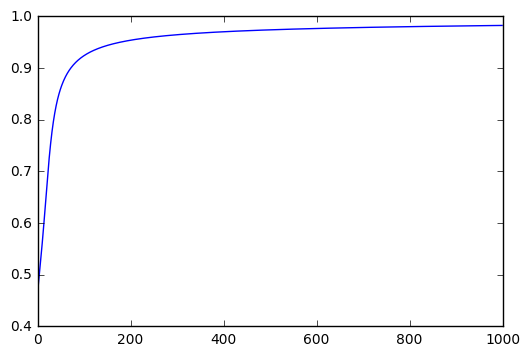

In [393]:
training_data = [
    np.array([0,0,1]),
    np.array([0,1,1]),
    np.array([1,0,1]),
    np.array([1,1,1]),
]

target = [0,1,1,0]

nn1 = ANN(3, x)
deltaVec = []
for i in range(1000):
    
    nn1.hidden_layers[0].compute_layer()
    deltaVec.append(nn1.output_layer.compute_layer())        
    nn1.output_layer.backpropagate([1])
    nn1.hidden_layers[0].backpropagate()    
    nn1.output_layer.delta
    nn1.hidden_layers[0].delta
    nn1.output_layer.update()
    nn1.hidden_layers[0].update()
plt.plot(range(len(deltaVec)), deltaVec)

In [392]:
print (deltaVec[-1])

[0.97683112034037956]
